In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/homeprices_banglore.csv')
df.sample(5)

,area,bedrooms,price
15,1175,2,42.0
10,1800,3,82.0
13,1100,2,40.0
18,2770,3,102.0
5,1170,2,38.0


In [3]:
df.shape

(20, 3)

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
sx= MinMaxScaler()
sy= MinMaxScaler()

In [13]:
scaled_X = sx.fit_transform(df.drop('price',axis='columns'))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

<h2 style="color:cyan"> Batch Gradient Descent </h2>

In [43]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
	number_of_features = X.shape[1]
	w = np.ones(shape=(number_of_features))
	b = 0
	total_samples = X.shape[0]

	cost_list = []
	epoch_list = []

	for i in range(epochs):
		#Step 1 - Calculation of y_pred
		y_pred = np.dot(w, X.T) + b

		w_grad = -(2/total_samples)*(X.T.dot(y_true-y_pred))
		b_grad = -(2/total_samples)*np.sum(y_true-y_pred)

		w = w - learning_rate * w_grad
		b = b - learning_rate * b_grad

		cost = np.square(y_true-y_pred).mean()

		if i%10==0:
			cost_list.append(cost)
			epoch_list.append(i)
			# print(f'Epoch {i}: w: {w}, b: {b}, cost: {cost}')
		
	return w, b, cost, cost_list, epoch_list
	

In [44]:
w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],), 500)

In [45]:
w,b,cost,cost_list, epoch_list

(array([0.70712464, 0.67456527]),
 -0.23034857438407427,
 0.0068641890429808105,
 [0.2768777174681,
  0.16573507027671064,
  0.10212908135956808,
  0.06564235879682481,
  0.04463022365578522,
  0.03245122421764872,
  0.025317339083010492,
  0.021067914076635823,
  0.01847041893523527,
  0.016821657535428185,
  0.015720331469182485,
  0.014937329116527901,
  0.014341749105819087,
  0.0138587099774241,
  0.013445288028074867,
  0.013076793952344979,
  0.012738945874049962,
  0.012423405193086517,
  0.012125230310262438,
  0.011841424159334757,
  0.011570105565415722,
  0.011310036391930275,
  0.01106035160957391,
  0.010820405104702651,
  0.010589681505198633,
  0.010367745666240432,
  0.010154213642862602,
  0.009948735925187012,
  0.009750987675343718,
  0.009560662965348804,
  0.009377471304274599,
  0.009201135478234784,
  0.009031390146006546,
  0.008867980872255637,
  0.008710663416728342,
  0.008559203175573597,
  0.008413374715338717,
  0.008272961365501463,
  0.00813775484985072

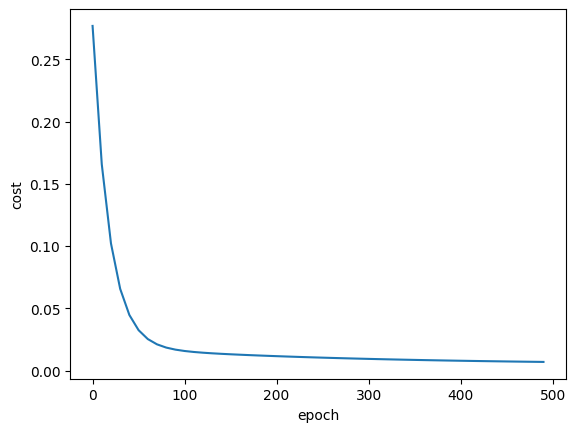

In [46]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list,cost_list)

In [47]:
sx.transform([[2600,4]])

d:\Artificial Intelligence\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.62068966, 0.75      ]])

In [54]:
def predict(area, bedrooms, w, b):
	scaled_X = sx.transform([[area, bedrooms]])[0]
	pred_price = w[0]*scaled_X[0] + w[1]*scaled_X[1] + b
	return sy.inverse_transform([[pred_price]])

In [55]:
predict(2600,4,w,b)

d:\Artificial Intelligence\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[128.45484403]])

In [56]:
predict(1000,2,w,b)

d:\Artificial Intelligence\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[30.25309446]])

In [57]:
predict(2250,3,w,b)

d:\Artificial Intelligence\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[94.16701133]])

<h2 style="color:cyan"> Stochastic Gradient Descent </h2>

In [63]:
import random
random.randint(0,10)

7

In [64]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
	number_of_features = X.shape[1]
	w = np.ones(shape=(number_of_features))
	b = 0
	total_samples = X.shape[0]

	cost_list = []
	epoch_list = []

	for i in range(epochs):
		random_index = random.randint(0,total_samples-1)
		sample_x = X[random_index]
		sample_y = y_true[random_index]

		y_pred = np.dot(w, sample_x.T) + b

		w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_pred))
		b_grad = -(2/total_samples)*(sample_y-y_pred)

		w = w - learning_rate * w_grad
		b = b - learning_rate * b_grad

		cost = np.square(sample_y-y_pred).mean()

		if i%100==0:
			cost_list.append(cost)
			epoch_list.append(i)
			# print(f'Epoch {i}: w: {w}, b: {b}, cost: {cost}')

	return w, b, cost, cost_list, epoch_list

In [65]:
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],), 10000)

In [66]:
w_sgd, b_sgd, cost_sgd

(array([0.70480925, 0.67172049]), -0.23053993646952708, 0.006281598950225581)

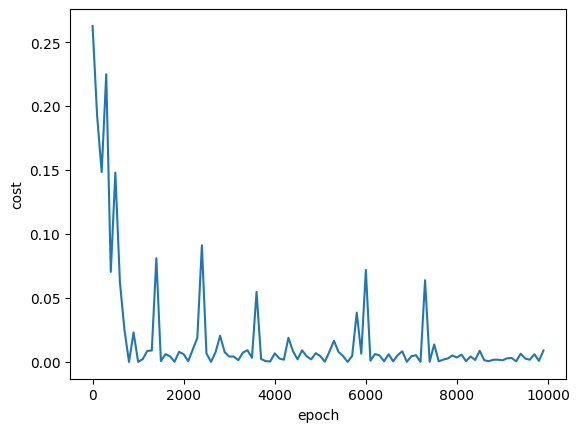

In [67]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list_sgd,cost_list_sgd)

In [68]:
def predict_sgd(area, bedrooms, w, b):
	scaled_X = sx.transform([[area, bedrooms]])[0]
	pred_price = w[0]*scaled_X[0] + w[1]*scaled_X[1] + b
	return sy.inverse_transform([[pred_price]])

In [69]:
predict_sgd(2600,4,w_sgd,b_sgd)

d:\Artificial Intelligence\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[127.94696308]])